In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("rainfall_final_df.csv")

In [3]:
df.head()

,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0.108504,0.860,0.790323,0.89,0.198347,0.676471,0.332613,1
1,0.436950,0.752,0.532258,0.17,0.867769,0.176471,0.172786,0
2,0.222874,0.888,0.612903,0.27,0.892562,0.617647,0.092873,0
3,0.246334,0.712,0.935484,0.88,0.008264,0.088235,0.386609,1
4,0.665689,0.296,0.483871,0.18,0.834711,0.029412,0.431965,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
X = df.drop(columns=["rainfall"])  
y = df["rainfall"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [8]:
results = []

for name, model in models.items():
    pipeline = Pipeline([  
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 94, number of negative: 93
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502674 -> initscore=0.010695
[LightGBM] [Info] Start training from score 0.010695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [9]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
1,Decision Tree,0.744681,0.739130,0.739130,0.739130
3,Gradient Boosting,0.744681,0.703704,0.826087,0.760000
4,AdaBoost,0.744681,0.703704,0.826087,0.760000
8,XGBoost,0.744681,0.720000,0.782609,0.750000
9,LightGBM,0.744681,0.720000,0.782609,0.750000
10,CatBoost,0.723404,0.678571,0.826087,0.745098
2,Random Forest,0.702128,0.655172,0.826087,0.730769
6,k-NN,0.680851,0.653846,0.739130,0.693878
7,Naive Bayes,0.659574,0.620690,0.782609,0.692308
0,Logistic Regression,0.638298,0.607143,0.739130,0.666667


In [54]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [200, 210], 
    "max_features":['sqrt', 'log2'],
    "max_depth": [None,1,2],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1, 2]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)

In [57]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2],
                         'n_estimators': [200, 210]},
             verbose=2)

In [58]:
best_rf_model = grid_search_rf.best_estimator_

In [59]:
grid_search_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
cv_scores

array([0.73684211, 0.89473684, 0.83783784, 0.83783784, 0.86486486])

In [62]:
np.mean(cv_scores)

0.8344238975817924

In [63]:
y_pred = best_rf_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.7446808510638298

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, y_pred)

array([[16,  8],
       [ 4, 19]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report

In [68]:
report_dict = classification_report(y_test, y_pred, output_dict = True)

In [69]:
report_dict

{'0': {'precision': 0.8,
  'recall': 0.6666666666666666,
  'f1-score': 0.7272727272727273,
  'support': 24.0},
 '1': {'precision': 0.7037037037037037,
  'recall': 0.8260869565217391,
  'f1-score': 0.76,
  'support': 23.0},
 'accuracy': 0.7446808510638298,
 'macro avg': {'precision': 0.7518518518518519,
  'recall': 0.7463768115942029,
  'f1-score': 0.7436363636363637,
  'support': 47.0},
 'weighted avg': {'precision': 0.7528762805358552,
  'recall': 0.7446808510638298,
  'f1-score': 0.7432882011605416,
  'support': 47.0}}

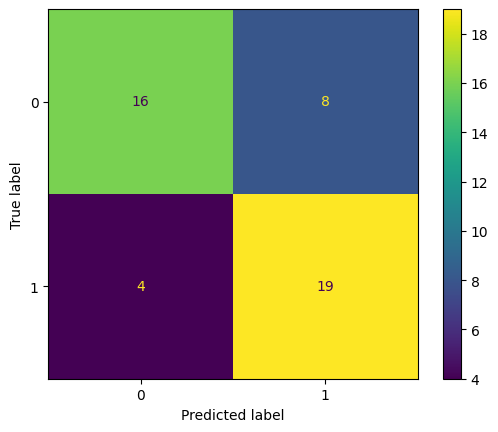

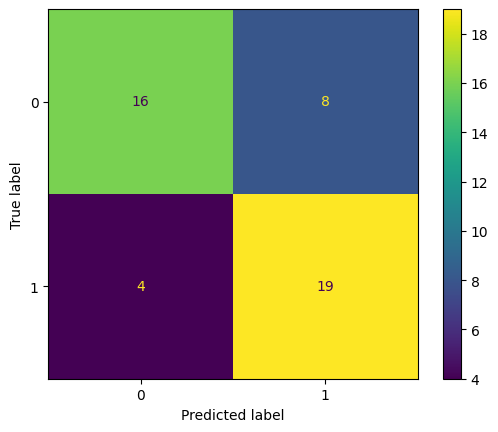

In [70]:
# plot confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
cm.figure_

In [47]:
import mlflow

In [71]:
mlflow.set_experiment("Rainfall")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run(run_name="rainfall5"):
    mlflow.log_params(grid_search_rf.best_params_)
    mlflow.log_metrics({
        "Accuracy" : report_dict["accuracy"],
        "Precision_0" : report_dict["0"]["precision"],
        "Recall_0" : report_dict["0"]["recall"],

        "Precision_1" : report_dict["1"]["precision"],
        "Recall_1" : report_dict["1"]["recall"],
        "f1_score_macro":report_dict['macro avg']['f1-score']
        
    })
    # log confusion matrix
    mlflow.log_figure(figure=cm.figure_, artifact_file="confusion_matrix.png")
    mlflow.sklearn.log_model(best_rf_model, "Random Forest Model", registered_model_name="RainFall_RF_model")

2025/02/02 07:44:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RainFall_RF_model' already exists. Creating a new version of this model...
2025/02/02 07:44:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RainFall_RF_model, version 4


🏃 View run rainfall5 at: http://127.0.0.1:5000/#/experiments/370065289959288740/runs/58609ffed04e4b50b3d0bafcd463f3fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/370065289959288740


Created version '4' of model 'RainFall_RF_model'.


In [72]:
# register the model 
# model_name = "Random Forest Model Data"
# run_id = "d726b84f17224eb7bdbe8b46fcd31bb9"
# model_uri = f'runs:/{run_id}/{model_name}'

# with mlflow.start_run(run_id = run_id):
#     mlflow.register_model(model_uri=model_uri, name = model_name)

## Make Predictions

In [73]:
logged_model = 'runs:/076e18d5b62043349db672a238cad5fb/Random Forest Model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

loaded_model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [74]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: Random Forest Model
  flavor: mlflow.sklearn
  run_id: 076e18d5b62043349db672a238cad5fb

In [76]:
model_name = "RainFall_RF_model"
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = 'rainfall-prediction-production'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'rainfall-prediction-production'.
Copied version '2' of model 'RainFall_RF_model' to version '1' of model 'rainfall-prediction-production'.


<ModelVersion: aliases=[], creation_timestamp=1738462762357, current_stage='None', description='', last_updated_timestamp=1738462762357, name='rainfall-prediction-production', run_id='ad51fce886c84c6baef18c4bc418a509', run_link='', source='models:/RainFall_RF_model/2', status='READY', status_message='', tags={}, user_id='', version='1'>

In [78]:
model_version = 1
prod_model_uri = f'models:/{model_name}@champion'

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)

In [79]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [110]:
X.columns

Index(['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [115]:
df.head()

,pressure,temparature,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0.108504,0.860,0.790323,0.89,0.198347,0.676471,0.332613,1
1,0.436950,0.752,0.532258,0.17,0.867769,0.176471,0.172786,0
2,0.222874,0.888,0.612903,0.27,0.892562,0.617647,0.092873,0
3,0.246334,0.712,0.935484,0.88,0.008264,0.088235,0.386609,1
4,0.665689,0.296,0.483871,0.18,0.834711,0.029412,0.431965,0


In [132]:
# Predictive System
# pressure	temparature	humidity	cloud	sunshine	winddirection	windspeed	rainfall
# input_df = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
# input_df = (0.108504, 0.860, 0.790323, 0.89, 0.198347, 0.676471,0.332613)
input_df = (0.436950, 0.06, 0.532258, 0.16, 0.867769, 0.176471, 0.172786)
input_df = pd.DataFrame([input_df], ['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [133]:
prediction = loaded_model.predict(input_df)
prediction

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [134]:
prediction[0] == 1

False

In [135]:
print("Prediction Result: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result:  No Rainfall
